In [1]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, 
               nonscatter=True, s0=10):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label,
                        s=s0)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if dx:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)


/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_n

--No graphics will be displayed.


1.0

In [50]:
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='',linewidth=2, linestyle='-',xlim=[0,100],
               dx=20, ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, facecolors='none',
               nonscatter=True, s0=10, facecolor='none', zorder=2):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=linewidth,linestyle=linestyle,alpha=alpha, label=label, zorder=zorder)
        else:
            ax2.plot(x,y,linewidth=linewidth,alpha=alpha, linestyle=linestyle,label=label, zorder=zorder)
    else:
        if color:
            ax2.scatter(x,y,edgecolors=color,facecolors = facecolor, alpha=alpha, 
                        label=label, s=s0, zorder=zorder)
        else:
            ax2.scatter(x,y, alpha=alpha, label=label,
                        s=s0, zorder=zorder)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
        # ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=fontsize,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=fontsize,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')


In [66]:
run_dt = 0.1
dV=10.
fE =1e-3 
passive = True
E = True
loc=34
location ='apic'

L5PC = h.L5PCtemplate(morphologyFilename)

if passive:
    for sec in h.allsec():
        # 检查 section 是否有主动离子通道
        if h.ismembrane("na3", sec=sec):
            # 将电导设置为0
            sec.gbar_na3 = 0.
        if h.ismembrane("h", sec=sec):
            sec.ghdbar_h = 0.
        if h.ismembrane("kadist", sec=sec):
            sec.gkabar_kadist = 0.
        if h.ismembrane("kaprox", sec=sec):
            sec.gkabar_kaprox = 0.
        if h.ismembrane("kdrca1", sec=sec):
            sec.gkdrbar_kdrca1 = 0.
        if h.ismembrane("nax", sec=sec):
            sec.gbar_nax = 0.
        if h.ismembrane("Ca_HVA",sec=sec):
            sec.gCa_HVAbar_Ca_HVA = 0.
        if h.ismembrane("Ca_LVAst",sec=sec):
            sec.gCa_LVAstbar_Ca_LVAst = 0.
        if h.ismembrane("Ih",sec=sec):
            sec.gIhbar_Ih = 0.
        if h.ismembrane("Im",sec=sec):
            sec.gImbar_Im = 0.
        if h.ismembrane("K_Pst",sec=sec):
            sec.gK_Pstbar_K_Pst = 0.
        if h.ismembrane("K_Tst",sec=sec):
            sec.gK_Tstbar_K_Tst = 0.
        if h.ismembrane("Nap_Et2",sec=sec):
            sec.gNap_Et2bar_Nap_Et2 = 0.
        if h.ismembrane("NaTa_t",sec=sec):
            sec.gNaTa_tbar_NaTa_t = 0.
        if h.ismembrane("NaTs2_t",sec=sec):
            sec.gNaTs2_tbar_NaTs2_t = 0.
        if h.ismembrane("SK_E2",sec=sec):
            sec.gSK_E2bar_SK_E2 = 0.
        if h.ismembrane("SKv3_1",sec=sec):
            sec.gSKv3_1bar_SKv3_1 = 0.   

# Set simulation parameters
h.dt = run_dt
h.tstop = 200.
h.v_init = -77.
v_clamp = -77.

recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)


# Initialize an excitatory or inhibitory synaptic input
# make a new stimulator
stim = h.NetStim()

# attach it to a synapse
if location == 'dend':
    syn = h.Exp2Syn(L5PC.dend[int(loc)](0.9))
if location == 'apic':
    syn = h.Exp2Syn(L5PC.apic[int(loc)](0.9))
syn.tau1 = 1.  # ms
syn.tau2 = 5.  # ms
if E:
    syn.e = 0.  # mV for E input and -80 for I input
else: 
    syn.e = -100.
# print(syn.e)
    
stim.number = 1
stim.start = 100.  # ms
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0.
ncstim.weight[0] = 0.  # uS


# Initialize voltage clamp
vclamp = h.SEClamp(L5PC.soma[0](0.5))
vclamp.amp1 = v_clamp
vclamp.dur1 = h.tstop
vclamp.amp2 = v_clamp - 20.

irec = h.Vector()
irec.record(vclamp._ref_i)

# Function to initialize the simulation
def initialize():
    h.t = 0
    h.finitialize(h.v_init)
    h.fcurrent()

# Function to integrate the simulation
def integrate():
    while h.t < h.tstop:
        h.fadvance()

# Function to run the simulation
def go():
    initialize()
    integrate()

# Main simulation loop


Vclamp = np.arange(-100.,-20., dV) 
Isyn_inj = np.zeros(len(Vclamp))
vclamp.dur1 = 0.
vclamp.dur2 = 0.
vclamp.dur3 = 0.
ncstim.weight[0] = 0.
go()
recv0 = np.array(recv.to_python())
V_rest = recv0[2000]
# print(V_rest)
Isyn_inj_t = np.zeros((len(Vclamp),1000))
Isyn1_t = np.zeros((len(Vclamp),1000))
Isyn0_t = np.zeros((len(Vclamp),1000))

for i in range(len(Vclamp)):
    ncstim.weight[0] = 0.
    vclamp.amp1 = Vclamp[i]
    vclamp.dur1 = h.tstop
    go()
    
    Isyn0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
    Isyn0_t[i,:] = Isyn0[1001:]
    ncstim.weight[0] = fE
    vclamp.amp1 = Vclamp[i]
    vclamp.dur1 = h.tstop
    go()
    Isyn1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
    Isyn= - (Isyn1[1001:] - Isyn0[1001:])
    Isyn1_t [i,:]= Isyn1[1001:]
    Isyn_inj[i] = np.mean(Isyn)
    Isyn_inj_t[i,:] = Isyn
                
A = np.ones((len(Vclamp),2))
A[:,0] = Vclamp - V_rest
A1 = Vclamp - V_rest
x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj, rcond=None)
if E:
    mean_local_conductance = - x[1]**2/(x[0]*(0. - V_rest)**2)
    A1 = A1 - (0. - V_rest)
else:
    mean_local_conductance = - x[1]**2/(x[0]*(-80.-V_rest)**2)
    A1 = A1 - (-80. - V_rest)
    
traditional_effective_conductance = np.zeros(1000)
for i in range(1000):
    a = np.sum(A1 * Isyn_inj_t[:,i]) / np.sum(A1**2)  # 计算斜率
    traditional_effective_conductance[i] = - a
    
traditional_mean_conductance = np.mean(traditional_effective_conductance)

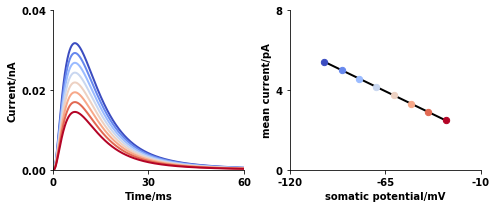

In [65]:
def model(x, a, b):
    return a*x+b

from matplotlib.cm import ScalarMappable
time = np.linspace(0,100, np.shape(Isyn_inj_t)[1])
# 定义一个颜色映射，根据Vclamp值映射颜色
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(Vclamp.min(), Vclamp.max())
sm = ScalarMappable(norm=norm, cmap=cmap)

fig, ax2 = plt.subplots(1,2, figsize = (7,3.))


for i in range(len(Vclamp)):
    color = sm.to_rgba(Vclamp[i])  # 使用Vclamp值对应的颜色
    plot_curve(ax2[0], time, Isyn_inj_t[i,:],color=color,linewidth=2, 
    xlim=[0,60],dx=30, ylim=[0,0.04], dy=0.02, ynum_decimals=2, ylabel='Current/nA',)
    plot_curve(ax2[1], Vclamp[i], np.mean(Isyn_inj_t[i,:])*1e3,color=color, facecolor=color,
               xlabel='somatic potential/mV',
    xlim=[-120,-10],dx=55, ylim=[0,8], dy=4, ynum_decimals=0,s0=40, ylabel='mean current/pA',nonscatter=False, zorder=3)
 
params, params_covariance = curve_fit(model, Vclamp, Isyn_inj, p0=[1, 1])
x = np.linspace(Vclamp[0],Vclamp[-1],100)
y = model(x, params[0], params[1])
plot_curve(ax2[1],x, y*1e3, color='black', xlim=[-120,-10], dx=55,xlabel='somatic potential/mV',
                ylim=[0,8], dy=4, ynum_decimals=0,s0=40, ylabel='mean current/pA', zorder=1)   

# # 添加colorbar
# cbar = plt.colorbar(sm, ax=ax2)
# cbar.set_label('somatic potential/mV',fontsize=10,weight='bold')
plt.tight_layout()
plt.savefig('flow_diagram_mean_local_cond.eps', format='eps')

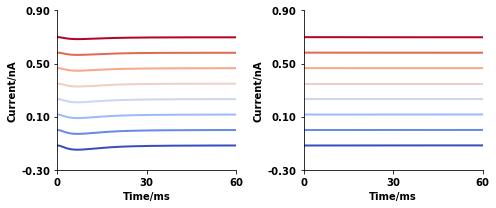

In [69]:
def model(x, a, b):
    return a*x+b

from matplotlib.cm import ScalarMappable
time = np.linspace(0,100, np.shape(Isyn_inj_t)[1])
# 定义一个颜色映射，根据Vclamp值映射颜色
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(Vclamp.min(), Vclamp.max())
sm = ScalarMappable(norm=norm, cmap=cmap)

fig, ax2 = plt.subplots(1,2, figsize = (7,3.))


for i in range(len(Vclamp)):
    color = sm.to_rgba(Vclamp[i])  # 使用Vclamp值对应的颜色
    plot_curve(ax2[0], time, Isyn1_t[i,:],color=color,linewidth=2, 
    xlim=[0,60],dx=30, ylim=[-0.3,0.9], dy=0.4, ynum_decimals=2, ylabel='Current/nA',)
    plot_curve(ax2[1], time, Isyn0_t[i,:],color=color,linewidth=2, 
    xlim=[0,60],dx=30, ylim=[-0.3,0.9], dy=0.4, ynum_decimals=2, ylabel='Current/nA',)


# # 添加colorbar
# cbar = plt.colorbar(sm, ax=ax2)
# cbar.set_label('somatic potential/msV',fontsize=10,weight='bold')
plt.tight_layout()
# plt.savefig('flow_diagram_mean_local_cond.eps', format='eps')

In [68]:
var=Isyn0_t
print(np.min(var), np.max(var))

-0.11705968319711246 0.698534551429038
